# Exercise 1 - Terminology

Describe the following terms with your own words:

***Shape of a numpy array:***

***Elementwise operation:*** 

***Name at least 4 packages used in the python scientific ecosystem and explain when they are helpful:***

***How many dimensions do the following numpy arrays have?*** (Hint: use the command shape to confirm your answers!)
-  `np.array([1])`
-  `np.array([[1, 2, 3], [1, 2, 3]])`
-  `np.array([1, 2, 3, 1, 2, 3])`
-  `np.array([[1]])`

In [1]:
### BEGIN SOLUTION

***Shape of a numpy array:*** The shape of a numpy array is the length of the array in each dimension.

***Elementwise operation:*** Performing a computation for each element in one or multiple arrays independently and storing the result in a new array.

***Name at least 4 packages used in the python scientific ecosystem and explain when they are helpful:***
- numpy: store multidimensional arrays and do fast (elementwise) calculations
- scipy: more scientific algorithms in addtion to numpy
- jupyter: use Python in notebooks similar to Datalor
- matplotlib: plotting data

***How many dimensions do the following numpy arrays have?*** (Hint: use the command shape to confirm your answers!)
-  `np.array([1])`: 1-dimensional
-  `np.array([[1, 2, 3], [1, 2, 3]])`: 2-dimensional
-  `np.array([1, 2, 3, 1, 2, 3])`: 1-dimensional
-  `np.array([[1]])`: 2-dimensional

In [2]:
### END SOLUTION

# Exercise 2 - Wind speeds

Given is a numpy array `wind_speeds` which contains hourly wind speed time series along the latitude 62.721° in m/s. The columns are different (equidistant) positions ranging from longitude -172.714° to -160.46388°. The rows are different hourly time stamps starting at 2012-03-01 (in total three days).

- Determine the shape of the array and check if the results are plausible, i.e. do the array dimensions match the expected number of data points?
- Calculate the mean wind speed over all time stamps and all locations and store it in variable `wind_speeds_mean`. Then calculate the mean at longitude -160.46388° and all time stamps and store it in `wind_speeds_lon160_mean`.
- Plot the wind speeds across the given longitudes at 2012-03-01 12:00 (assume 00:00 is the first row).
- Plot the time series at longitude -160.46388° (use a second figure).

Don't forget to label all axes!

(You do not need to take care about the values on the axis.)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)  # you can change this to adjust the figure size

In [4]:
# donwload the data
import urllib
import os.path
fname = 'windspeeds.csv'
if not os.path.exists(fname):
    URI = 'https://files.boku.ac.at/filr/public-link/file-download/0d7483c99572915f0195892102c26e01/18661/2534960446703962903/' + fname
    urllib.request.urlretrieve(URI, filename=fname)

wind_speeds = np.genfromtxt(fname, delimiter=';')

In [5]:
wind_speeds[:5, :3]

array([[ 9.77241186,  9.51976297,  9.38921177],
       [10.64679033, 10.41143906, 10.27299766],
       [11.31440381, 11.07651515, 10.95805904],
       [11.8903395 , 11.63285286, 11.49750779],
       [11.92733561, 11.64692482, 11.49403723]])

In [6]:
### BEGIN SOLUTION

In [7]:
wind_speeds.shape

(72, 50)

The description says that there are 3 days of hourly time stamps, so 24 * 3 = 72 looks good.

The grid on the longitude seems to be about 0.25°:

In [8]:
(-172.714 -  -160.46388)/(wind_speeds.shape[1] - 1)

-0.250002448979592

In [9]:
wind_speeds_mean = wind_speeds.mean()
wind_speeds_mean

np.float64(7.60310454961389)

In [10]:
wind_speeds_lon160_mean = wind_speeds[:, -1].mean()
wind_speeds_lon160_mean

np.float64(3.6891145479166667)

In [11]:
import matplotlib.pyplot as plt

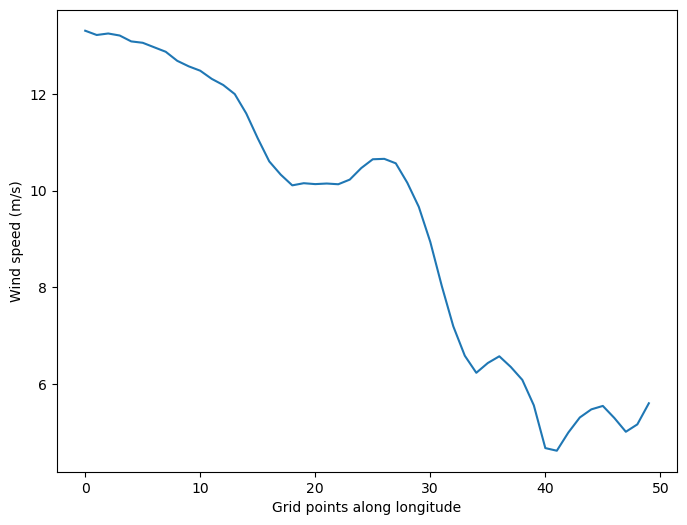

In [12]:
plt.plot(wind_speeds[12, :])
plt.xlabel('Grid points along longitude')
plt.ylabel('Wind speed (m/s)');

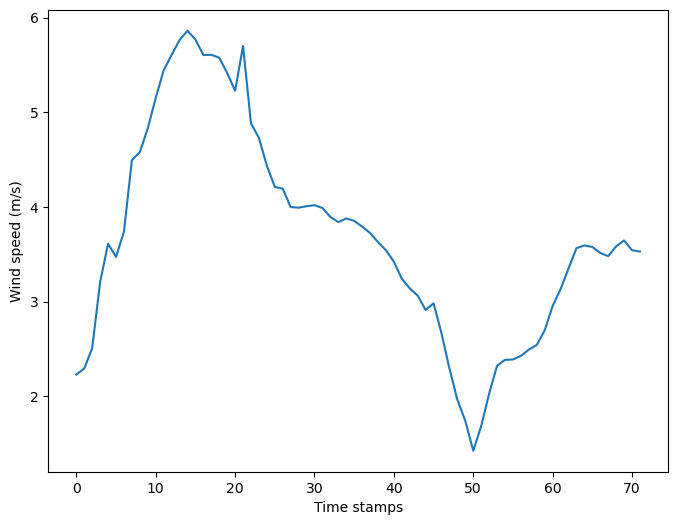

In [13]:
plt.plot(wind_speeds[:, -1])
plt.xlabel('Time stamps')
plt.ylabel('Wind speed (m/s)');

In [14]:
### END SOLUTION

In [15]:
# # # # # RUN THIS CELL TO CHECK YOUR RESULTS # # # # # 

from urllib.request import urlretrieve
import os.path
if not os.path.exists('check.py'):
    urlretrieve('https://raw.githubusercontent.com/inwe-boku/lecture-scientific-programming/refs/heads/main/check.py', filename='check.py')
from check import check_solution
check_solution([
    ("wind_speeds_mean", 7.60),
    ("wind_speeds_lon160_mean", 3.69),
], globals())

✅ 2 tests passed. Great! 👌


# Exercise 3 - Wind power

In this exercise, we calculate the wind power for the wind speeds given in Exercise 2 in the variable `wind_speeds`. First, use the function `windpower_simulation_mw` defined below to calculate the wind power production in all timesteps for all locations. Assume a turbine with a rotor diameter of 60m and a rated capacity of 5MW. Second, calculate the mean, the max, and the min windpower output at all locations during all timesteps and store it in variable `mean_windpower_mw`, `max_windpower_mw`, and `min_windpower_mw`. Third, do a histogram of windpower output at longitude -172.714°. Make a new cell and plot a histogram of windpower outputs at longitude -160.46388°. Also calculate the mean wind power output at the two locations, store them to `mean_windpower_longitude_172` and `mean_windpower_longitude_160` and compare them. Please define correct x and y labels!


At which location would you rather build a windturbine? When you look at the two histograms for the two locations, what cleary indicates that one location is better than the other? 

In [16]:
def windpower_simulation_mw(wind_speed_ms, rotor_diameter_m, rated_capacity_mw):
    """Calculate output of a wind turbine in MW, given wind speed in m/s and rotor_diameter in m, 
       accounting for rated capacity."""
    c_p = 0.4
    rho = 1  # air density in kg/m3, highly simplified assumption
    area = rotor_diameter_m**2 * np.pi / 4
    p_out = c_p * 0.5 * rho * area * wind_speed_ms**3 / 1e6
    p_out = np.clip(p_out, 0, rated_capacity_mw)
    return p_out

In [17]:
### BEGIN SOLUTION

In [18]:
windpower_mw = windpower_simulation_mw(wind_speeds, 60, 5)
mean_windpower_mw = windpower_mw.mean()
max_windpower_mw = windpower_mw.max()
min_windpower_mw = windpower_mw.min()

print("Mean wind power in MW:", mean_windpower_mw)
print("Max wind power in MW:", max_windpower_mw)
print("Min wind power in MW:", min_windpower_mw)

Mean wind power in MW: 0.3761185616682442
Max wind power in MW: 1.5295862236971347
Min wind power in MW: 0.001638840442721162


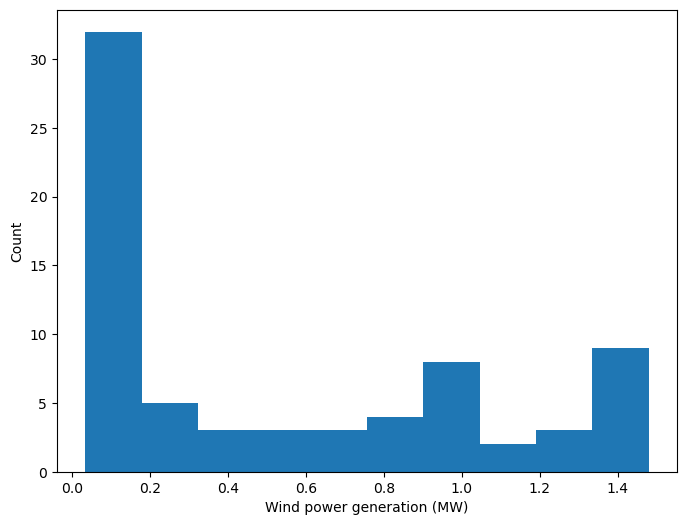

In [19]:
plt.hist(windpower_mw[:, 0])
plt.xlabel("Wind power generation (MW)")
plt.ylabel("Count")

mean_windpower_longitude_172 = windpower_mw[:, 0].mean()

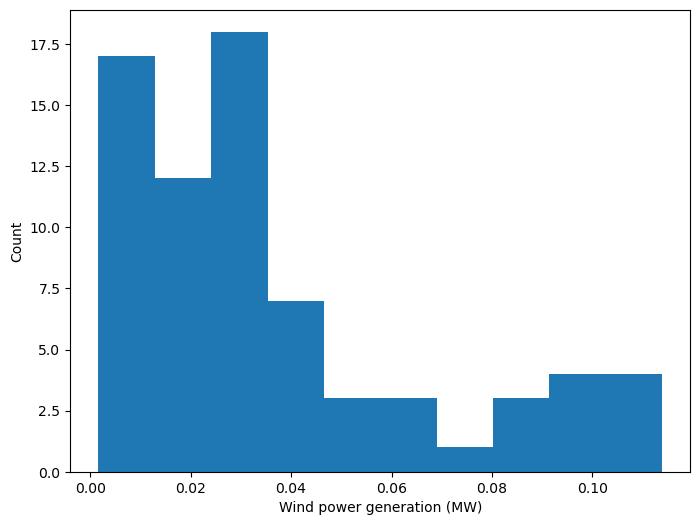

In [20]:
plt.hist(windpower_mw[:, -1])
plt.xlabel("Wind power generation (MW)")
plt.ylabel("Count")

mean_windpower_longitude_160 = windpower_mw[:, -1].mean()

In [21]:
### END SOLUTION

In [22]:
# # # # # RUN THIS CELL TO CHECK YOUR RESULTS # # # # # 

from urllib.request import urlretrieve
import os.path
if not os.path.exists('check.py'):
    urlretrieve('https://raw.githubusercontent.com/inwe-boku/lecture-scientific-programming/refs/heads/main/check.py', filename='check.py')
from check import check_solution
check_solution([
    ("mean_windpower_mw", 0.38),
    ("min_windpower_mw", 0.00),
    ("max_windpower_mw", 1.53),
    ("mean_windpower_longitude_172", 0.54),
    ("mean_windpower_longitude_160", 0.04)
], globals())

✅ 5 tests passed. Execellent! ✨


# Exercise 4 - Covid-19 cases

The CSV file `covid19_austria.csv` contains on Covid-19 cases in Austria in 3 columns in this order: date, cumulative confirmed cases and cumulative reported deaths. Use the function `np.genfromtxt()` with the parameter `delimiter=','` to read the CSV file and load it to a numpy array. Alternatively, you can use the function `load_covid_cases_austria()` defined below to load the data instead of using `np.genfromtxt()`.

The first row contains the header of the CSV file (the titles of the columns). It is not supposed to be used. Also use a slicing operation to get rid of the first column before doing the steps below. The first column contains the dates, which are not parsed correctly by `np.genfromtxt()`, but since the CSV file is sorted, we can just assume the numpy array contains a value for each day since the start of the pandemic in Austria.

- Plot the cumulative confirmed cases during the last 150 days. You can compare your result to [this plot](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2021-10-15..latest&facet=none&hideControls=true&Metric=Confirmed+cases&Interval=Cumulative&Relative+to+Population=false&Color+by+test+positivity=false&country=~AUT).

- Plot the case fatality rate in percent, by dividing the number of total deaths by the number of total cases. You can compare your result to [this plot](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-14..latest&facet=none&pickerSort=asc&pickerMetric=location&hideControls=true&Metric=Case+fatality+rate&Interval=Cumulative&Relative+to+Population=false&Color+by+test+positivity=true&country=~AUT).

- Use the function `np.diff()` on the second column (cases) to get the daily cases. (find in the documentation why this is the right way to do it). Then use the function `np.argmax()` to find how many days ago (relative to the end of the data set) the maximum of daily cases was reported and store the result in the variable `maximum_before_days`.


Note that the second plot has to be interpreted with a grain of salt as the number of tests vary a lot. Therefore, the number of true deaths and true cases is not known and may differ a lot from the reported values. See [here](http://ourworldindata.org/mortality-risk-covid) for a more detailed analysis of this issue.

This exercise has been created in 2022. As of 2024 the number of performed Covid-19 tests is much lower, therefore the number of positive tests is not comparable. The [waste water monitoring](https://abwassermonitoring.at/dashboard/) indicates that there is still a very high number of new Covid-19 infections:

![Screenshot waste water monitoring](images/screenshot-waste-water-monitoring.png)

(This exercise uses numpy only and should mostly help to understand the concepts of numpy. During the next lectures, we will use pandas instead, which makes the same task a bit easier.)

In [23]:
# This code snipped was used to produce the CSV file used in this exercise. It downloads data from AGES and preprocesses them
# The result is already attached to the notbeook or can be downloaded from files.boku.ac.at directly (see code below).
#
# This means that you do not need to run the commented out code lines in this cell, because we did so already
# for you. If you re-download the data from AGES, you might end up with slightly different results.

# !wget --no-check-certificate --cipher 'DEFAULT:!DH' https://covid19-dashboard.ages.at/data/data.zip
# !unzip data.zip
# import pandas as pd
# data = pd.read_csv("CovidFaelle_Timeline.csv", delimiter=';', parse_dates=['Time'], dayfirst=True)
# covid_austria = data[data['Bundesland'] == 'Österreich'].set_index('Time').sort_index()
# new_data = pd.DataFrame({
#    'Cases_total': covid_austria.AnzahlFaelleSum,
#    'Deaths_total': covid_austria.AnzahlTotSum}
# )
# new_data.to_csv('covid19_austria.csv')

In [24]:
# donwload the data
import urllib
import os.path

fname = 'covid19_austria.csv'
if not os.path.exists(fname):
    URI = 'https://files.boku.ac.at/filr/public-link/file-download/0d7483c99572915f01958920c2806cf5/18657/8759111527431771580/covid19_austria.csv'
    urllib.request.urlretrieve(URI, filename=fname)

In [25]:
import pandas as pd

def load_covid_cases_austria():
    raw_data_dataframe = pd.read_csv('covid19_austria.csv', delimiter=',', dtype={'Cases_total': int, 'Deaths_total': int})
    # return a numpy array, because pandas has not been introduced in the lecture yet
    return raw_data_dataframe.values

In [26]:
### BEGIN SOLUTION

In [27]:
raw_data = load_covid_cases_austria()

In [28]:
raw_data

array([['2020-02-26', 1, 0],
       ['2020-02-27', 3, 0],
       ['2020-02-28', 7, 0],
       ...,
       ['2023-03-30', 6034369, 22139],
       ['2023-03-31', 6036140, 22139],
       ['2023-04-01', 6037322, 22139]], shape=(1131, 3), dtype=object)

In [29]:
cases_total = raw_data[:, 1]
deaths_total = raw_data[:, 2]

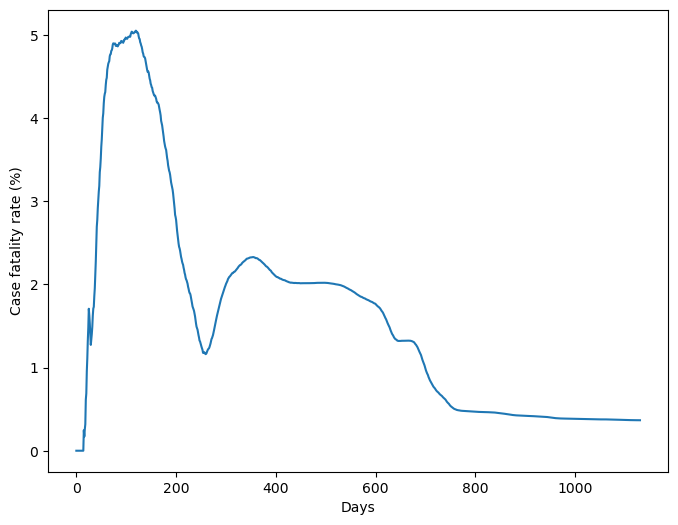

In [30]:
plt.plot(100 * deaths_total/cases_total)
plt.xlabel('Days')
plt.ylabel('Case fatality rate (%)');

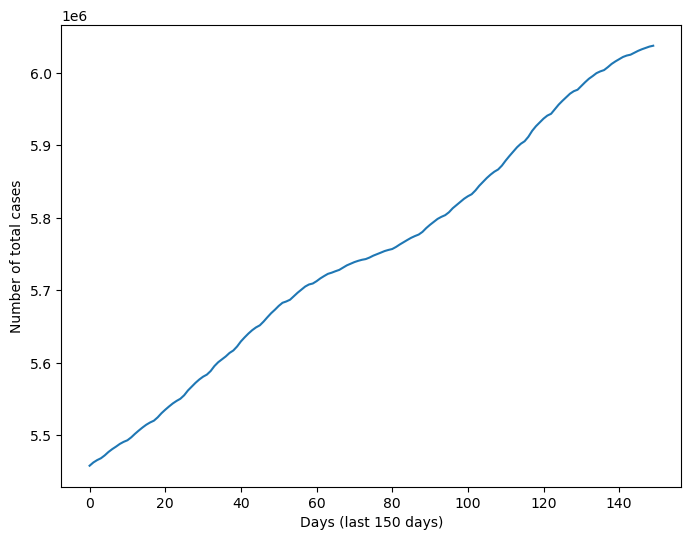

In [31]:
plt.plot(cases_total[-150:])
plt.xlabel('Days (last 150 days)')
plt.ylabel('Number of total cases');

In [32]:
np.diff(cases_total)

array([2, 4, 1, ..., 1934, 1771, 1182], shape=(1130,), dtype=object)

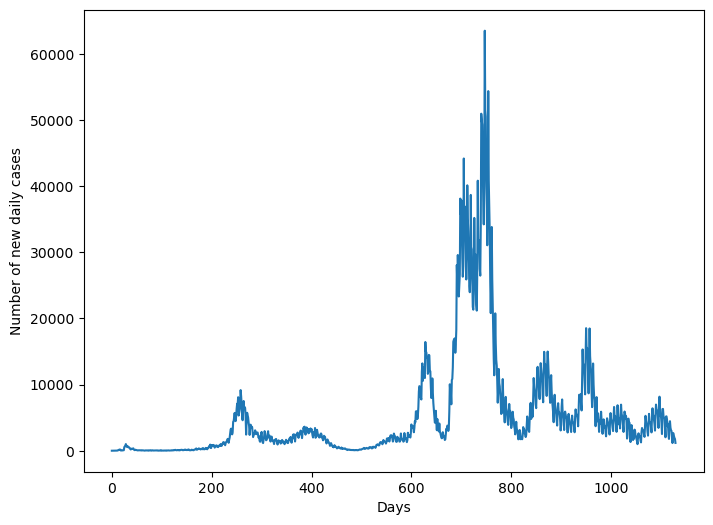

In [33]:
plt.plot(np.diff(cases_total))
plt.xlabel('Days')
plt.ylabel('Number of new daily cases');

In [34]:
# wrong solution:
# maximum_before_days = len(cases_total) - np.argmax(np.diff(cases_total))
# maximum_before_days

In [35]:
daily_new_cases = np.diff(cases_total)
maximum_before_days = len(daily_new_cases) - np.argmax(daily_new_cases) - 1
maximum_before_days

np.int64(382)

In [36]:
### END SOLUTION

In [37]:
# # # # # RUN THIS CELL TO CHECK YOUR RESULTS # # # # # 

from urllib.request import urlretrieve
import os.path
if not os.path.exists('check.py'):
    urlretrieve('https://raw.githubusercontent.com/inwe-boku/lecture-scientific-programming/refs/heads/main/check.py', filename='check.py')
from check import check_solution
check_solution([
    ("maximum_before_days", 382),
], globals())

✅ 1 tests passed. You are doing fine! ✌️


# Exercise 5 - Rotate and plot points in 2D (optional bonus exercise)

Plot the 5 points in 2D defined in the array `points`, then rotate the points by 90 degrees by performing a matrix multiplication with a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) by using `rotation_matrix @ points` and plot the result in the same plot. The rotation angle needs to be converted to radians before it is passed to `np.cos()` and `np.sin()`, use `np.radians(90)` to do so.

- If you want to add the legend to the plot, use the optional parameter `label` in the `plot` commands and then call `plt.legend()`.

The result should look similar to this:

![Solution preview](images/solution-rotated-points.png)

In [38]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[0, 0],
                   [1, 1],
                   [-1, -1],
                   [0, 1],
                   [0, 0.7],
                  ]).T

In [39]:
### BEGIN SOLUTION

In [40]:
alpha = np.radians(90)
rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                            [np.sin(alpha), np.cos(alpha)]])
points_rotated = rotation_matrix @ points

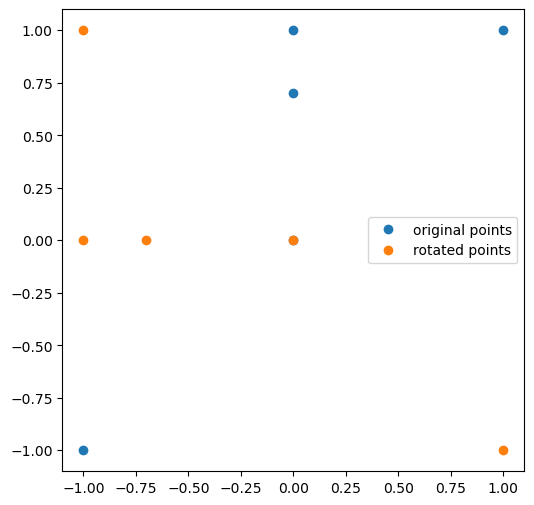

In [41]:
plt.plot(*points, 'o', label='original points')
plt.plot(*points_rotated, 'o', label='rotated points')
plt.legend()
plt.gca().set_aspect('equal')

In [42]:
### END SOLUTION

# Exercise 6 - Implement np.diff (optional bonus exercise)

Re-implement the function [`np.diff()`](https://numpy.org/doc/stable/reference/generated/numpy.diff.html). Name the new function `my_diff`. It should take a one dimensional numpy array `a` as input and calculate the consecutive differences between the elements, i.e. the difference of the second element and the first element, the difference of the third element and the second element etc. You can ignore all optional parameters of `np.diff()`.

- What is the length of the resulting array?
- Can you see the relation to the derivative of a function?
- Can you find a numpy function which does the reverse operation?

In [43]:
### BEGIN SOLUTION

In [44]:
def my_diff(a):
    return a[1:] -  a[:-1]

In [45]:
### END SOLUTION

In [46]:
# # # # # RUN THIS CELL TO CHECK YOUR RESULTS # # # # # 

import numpy as np
from urllib.request import urlretrieve
import os.path
if not os.path.exists('check.py'):
    urlretrieve('https://raw.githubusercontent.com/inwe-boku/lecture-scientific-programming/refs/heads/main/check.py', filename='check.py')
from check import check_solution
test_values = np.arange(3), np.zeros(10), np.array([1., 2.5, 5.]), np.array([])
check_solution([
    (f"my_diff(test_values[{i}])", np.diff(test_values[i]), None, np.testing.assert_allclose, 'check')
    for i in range(len(test_values))
], globals())

✅ 4 tests passed. All good! 🤝
